# Avocado Project

### Importing Libraries

In [11]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

# for visualization 
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

In [12]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\1st week\avocado.csv') 

In [13]:
df.head() # to display top 5 rows from the dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Dataset Description

Date - The date of the observation

AveragePrice - The average price of a single avocado

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Total Bags -  Total number of Bags sold

Small Bags -  Total number of Small Bags sold

Large Bags -  Total number of Large Bags sold

XLarge Bags - Total number of XLarge Bags sold

Type - (conventional or organic)

year - (2015-2016-2017-2018)

Region - The city or region of the observation

In [14]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (18249, 14)


In [15]:
print('List of columns: ',df.columns) # to display names of all the columns in the dataset

List of columns:  Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [16]:
df.isnull().sum()  # to check null values (checking for NaN)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### No missing values in the dataset

In [17]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [18]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### In Xlarge Bags column the standard deviation value is greater than mean value, so data is messed up. Also will be dropping 'Unnamed: 0' column

In [19]:
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [20]:
# dropping 'Unnamed:0' column as its just representing index position
df=df.drop(columns=['Unnamed: 0'])

In [21]:
XLarge=sum(df['XLarge Bags']==0) # to count sum of 0's present
XLarge

12048

In [22]:
XLarge * 100 / len(df)  # XLarge column has 66% of 0 values in its column

66.02005589347361

In [23]:
# replacing 0 values with mean of XLargebags
df['XLarge Bags']=df['XLarge Bags'].replace(0,df['XLarge Bags'].mean())

In [24]:
print('Mean of XLarge column:',df['XLarge Bags'].mean())
print('Standard deviation of XLarge column:',df['XLarge Bags'].std())

Mean of XLarge column: 5157.2910235522695
Standard deviation of XLarge column: 17391.40696963004


#### Still the standard deviation is having value more than mean with big margin, so i will drop the XLarge column

In [25]:
df=df.drop(columns=['XLarge Bags'])

In [26]:
# Similarly checking for Small bags, Large bags and Total bags
print('Total no of zeros in Large bags are:',sum(df['Large Bags']==0))
print('Total no of zeros in Small bags are:',sum(df['Small Bags']==0))
print('Total no of zeros in Total bags are:',sum(df['Total Bags']==0))
print('Total no of zeros in 4046 are:',sum(df['4046']==0))
print('Total no of zeros in 4225 are:',sum(df['4225']==0))
print('Total no of zeros in 4770 are:',sum(df['4770']==0))

Total no of zeros in Large bags are: 2370
Total no of zeros in Small bags are: 159
Total no of zeros in Total bags are: 15
Total no of zeros in 4046 are: 242
Total no of zeros in 4225 are: 61
Total no of zeros in 4770 are: 5497


#### So the total no of of zeros in each columns above are not that considerably high 

In [27]:
# replacing 0 values with mean 
df['Large Bags']=df['Large Bags'].replace(0,df['Large Bags'].median())
df['Small Bags']=df['Small Bags'].replace(0,df['Small Bags'].median())
df['Total Bags']=df['Total Bags'].replace(0,df['Total Bags'].median())
df['4046']=df['4046'].replace(0,df['4046'].median())
df['4225']=df['4225'].replace(0,df['4225'].median())
df['4770']=df['4770'].replace(0,df['4770'].median())

In [28]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['Date', 'type', 'region']

In [29]:
# to list numerical (integer/float) features in our dataset
num_features=[i for i in df.columns if df.dtypes[i]=='int64' or df.dtypes[i]=='float64']
num_features

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'year']

## To check categorical columns

In [30]:
df['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

In [32]:
# to display date in terms of month
month =df['Date'].dt.month 
month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [33]:
# to categorize month into seasons
season=[] # empty list
for i in month: # running loop 
    if (i==3 or i==4 or i==5):                      # checking if condition matches
        season.append('spring') #spring             # appending the result into the specific season accordingly
    elif (i==6 or i==7 or i==8):
        season.append('summer') #summer
    elif (i==9 or i==10 or i==11):
        season.append('autumn') #autumn
    elif (i==12 or i==1 or i==2):
        season.append('winter') #winter

In [34]:
df['season']=season # inserting season list to existing dataframe

In [35]:
df['season'].unique() # checking season list 

array(['winter', 'autumn', 'summer', 'spring'], dtype=object)

In [36]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

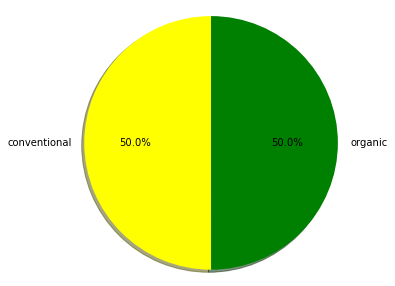

In [37]:
# to visualize column 'type' in pie chart

labels = ['conventional', 'organic']

fig, ax = plt.subplots(figsize=(5,5))
colors = ['yellow', 'green']
ax.pie(df['type'].value_counts(),  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)

ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### The data distribution of 'type' column present in dataset is equal as shown in pie chart

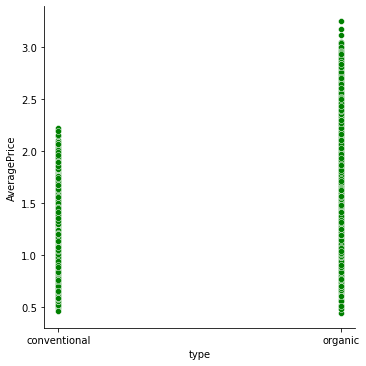

In [38]:
# to relate column type with average price
sns.relplot(x='type',y='AveragePrice',data=df,color='green')

#### For organic farming the average price of avocado is more than the conventional farming.

Text(0.5, 1.0, 'Range of Average Price of Avocado for Conventional and Organic ')

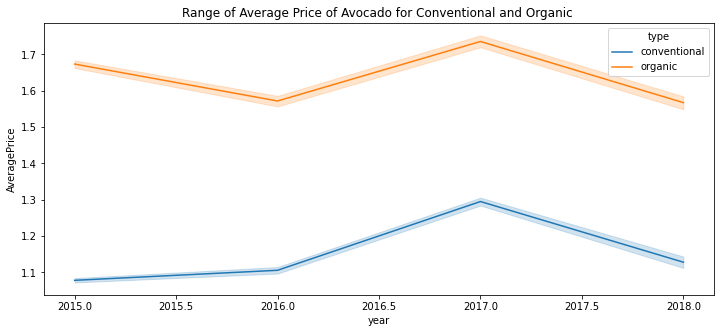

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)
plt.title('Range of Average Price of Avocado for Conventional and Organic ')

#### Its clear from the above plot that in the year 2017 the average price of avocado was at his peak for both conventional and organic. Also organic avocado prices are higher than the conventional prices which we stated earlier.

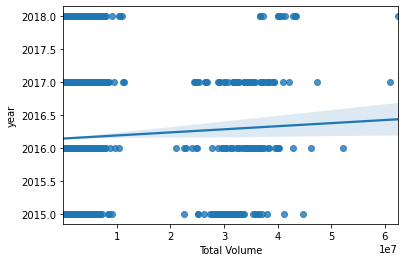

In [40]:
ax=sns.regplot(x='Total Volume',y='year' ,data=df )

#### Except 2018 year, for rest all years the total number of avocados sold are high in number

In [41]:
# to list down the regions of USA 
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [42]:
fig = px.box(df, x='region', y='AveragePrice')
fig.show()

#### The above box plot show each region/states of USA max,min,median,lower quartile and upper quartile range of average price of avocado 

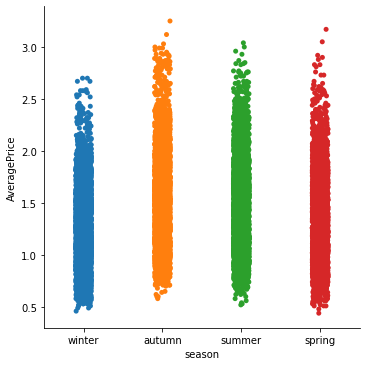

In [43]:
sns.catplot(x='season',y='AveragePrice',data=df)

#### In Autumn season,the average price of avocado is little high than rest of other seasons. In winter season there is a low yield in the production of avocado because it does not tolerate cold well.

In [44]:
df_new=df[['Total Bags','Small Bags','Large Bags','4046','4225','4770']]

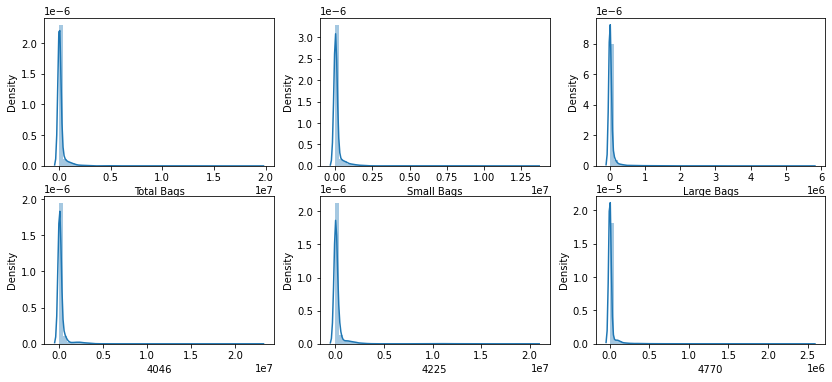

In [45]:
# to visualize columns
plt.figure(figsize=(14,6), facecolor='white')
plotnumber=1
for column in df_new:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [46]:
#### skewness can be seen 

In [47]:
# to see skewness for every continous column stored in data_new
for col in df_new:
    print(col)
    print(skew(df[col]))

Total Bags
9.755391356924704
Small Bags
9.540996976349366
Large Bags
9.800656635708433
4046
8.647787877335531
4225
8.942006165562125
4770
10.160424633273188


### Applying Log Transformation to remove skewness

In [48]:
df['Total Bags'] = np.log(df['Total Bags'])
df['Small Bags'] = np.log(df['Small Bags'])
df['Large Bags'] = np.log(df['Large Bags'])
df['4046'] = np.log(df['4046'])
df['4225'] = np.log(df['4225'])
df['4770'] = np.log(df['4770'])

In [49]:
# dopping date column as we have categorized into season list
df=df.drop(columns=['Date'])

In [50]:
# converting object into integers
df['type']= pd.get_dummies(df["type"]) 
df['season']= pd.get_dummies(df["season"])
df['region']= pd.get_dummies(df["region"])

In [51]:
last_column = df.pop('AveragePrice')

In [52]:
df.insert(11, 'AveragePrice', last_column)  # inserting Average Price at the last column as its our target/label

In [53]:
df.head() # checking if the Average Price is inserted to the last column

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,season,AveragePrice
0,64236.62,6.943836,10.905127,3.874529,9.070718,9.059938,4.535284,1,2015,1,0,1.33
1,54876.98,6.513645,10.706359,4.066117,9.159632,9.149323,4.579750,1,2015,1,0,1.35
2,118220.22,6.677965,11.600475,4.871373,9.005202,8.992459,4.636087,1,2015,1,0,0.93
3,78992.15,7.031741,11.184094,4.284689,8.667535,8.644249,4.896047,1,2015,1,0,1.08
4,51039.60,6.847453,10.688265,4.327834,8.729713,8.697222,5.286700,1,2015,1,1,1.28


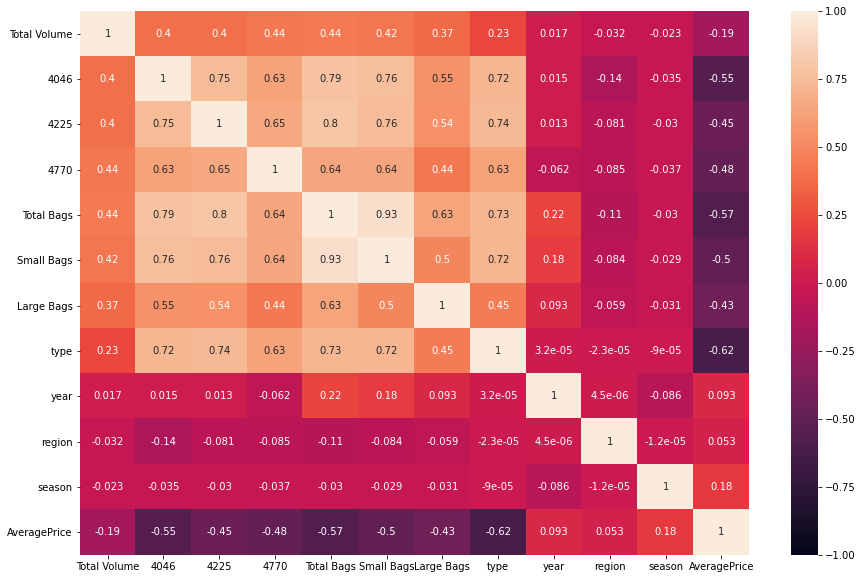

In [54]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Lots of features are negatively correlated with the target/label.

In [55]:
y = df['AveragePrice']
X = df.drop('AveragePrice', axis = 1)

In [56]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.431128,Total Volume
1,3.406333,4046
2,3.582312,4225
3,2.203847,4770
4,12.880807,Total Bags
5,9.120146,Small Bags
6,1.967572,Large Bags
7,3.088601,type
8,1.241602,year
9,1.056819,region


#### Multicollinearity problem exists between Total Bags and Small Bags as they are inter-related to each other and highly skewed.

In [58]:
df=df.drop(columns=['Total Bags'])

In [59]:
df.head()

,Total Volume,4046,4225,4770,Small Bags,Large Bags,type,year,region,season,AveragePrice
0,64236.62,6.943836,10.905127,3.874529,9.059938,4.535284,1,2015,1,0,1.33
1,54876.98,6.513645,10.706359,4.066117,9.149323,4.579750,1,2015,1,0,1.35
2,118220.22,6.677965,11.600475,4.871373,8.992459,4.636087,1,2015,1,0,0.93
3,78992.15,7.031741,11.184094,4.284689,8.644249,4.896047,1,2015,1,0,1.08
4,51039.60,6.847453,10.688265,4.327834,8.697222,5.286700,1,2015,1,1,1.28


In [60]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 101)

In [61]:
y_train.head()

15957    1.30
18149    1.42
6015     1.43
3122     0.90
17002    2.58
Name: AveragePrice, dtype: float64

In [62]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [63]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.5426317932040612

In [64]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.5307011793244443

In [65]:
# To cross verify
y_pred = regression.predict(x_test)

In [66]:
r2_score(y_test,y_pred)

0.5307011793244443

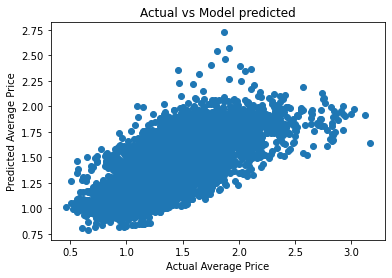

In [67]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual vs Model predicted')
plt.show()

In [68]:
mean_absolute_error(y_test,y_pred)

0.21365849282799834

In [69]:
mean_squared_error(y_test,y_pred)

0.07642258241831094

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.27644634636455395

### Using Regularization method to check whether our regression model is overfitting or not

In [71]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [72]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [73]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.205876437233454e-06

In [74]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.205876437233454e-06)

In [75]:
lasso_reg.score(x_test,y_test)

0.5307009781298878

### Using Ridge regression model

In [76]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [77]:
ridgecv.alpha_

0.001

In [78]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [79]:
ridge_model.score(x_test,y_test)

0.5307011722037273

#### So we can see by using different type of regularization,we still are getting the same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

## Using Decision Tree Regressor

In [80]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________

===================Test Result======================
Accuracy Score: 62.21%
______________________________________________


In [81]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[-1.25564261 -0.0783749  -0.13316656]
-0.4890613549050036
0.5425161439466495


## Random Forest Regressor

In [91]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=101)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 97.55%
______________________________________________

===================Test Result======================
Accuracy Score: 82.20%
______________________________________________


In [83]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[-0.40492056  0.40721705  0.1032444 ]
0.03518029680695878
0.3350287706256696


#### Using GridSearchCV for hyper parameter tuning on best model

In [85]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),              
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [86]:
grid_search = GridSearchCV(estimator=rand_reg,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [87]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=41), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [88]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [89]:
rand_reg = RandomForestRegressor(max_depth =17, min_samples_leaf=1, min_samples_split=2)
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=17)

In [90]:
rand_reg.score(x_test,y_test)

0.8207387137421801

## KNN Regressor

In [92]:
knn=KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 85.52%
______________________________________________

===================Test Result======================
Accuracy Score: 77.83%
______________________________________________


In [93]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=3)
print(score)
print(score.mean())
print(score.std())

[-0.9474727   0.18513396 -0.24473503]
-0.335691254777188
0.46683632984879686


In [94]:
# using bagging over our KNN regressor and see if our score improve:
from sklearn.ensemble import BaggingRegressor

In [95]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=6),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True,random_state=3,oob_score=True)

In [96]:
# lets check the out of bag score
bag_knn.oob_score

True

In [97]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.7521076437174756

In [98]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.6778765048418562

In [99]:
#xgboost
from xgboost.sklearn import XGBRegressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

xgb.score(x_test,y_test)

0.7872041132885184

#### Choosing Random Forest Regressor as the model to save for production because it is giving good accuracy score than other models.

## Model Saving

In [100]:
# saving the model to local system
filename = 'Avocado_model.pickle'
pickle.dump(rand_reg,open(filename,'wb'))